# Region-Based Image Segmentation Techniques

**DCIT407 - Image Processing Semester Project**  
**Group 19**

---

## Project Information

**Topic:** Techniques used in region-based image segmentation

**Team Members:**

| Name | Student ID | Role |
|------|-----------|------|
| Ryan Nii Akwei Brown | 11357610 | Group Leader |
| Cyril Ashong | 11253767 | Member |
| Prince Henry Kissi | 11063475 | Member |
| Martey Kelvin Mamah | 11237476 | Member |
| Ebenezer Nii Nai Badger | 11290659 | Member |
| Harriet Esinam Kale | 11357530 | Member |
| Delina Awash Welday | 11358725 | Member |
| Owusu Emmanuel Takyi | 11264083 | Member |

**Start Date:** February 6, 2026

---

## Table of Contents
1. [Project Setup and Repository Structure](#setup)
2. [Theory: Region-Based Image Segmentation](#theory)
3. [Mathematical Foundations](#mathematics)
4. [Implementation: Environment Setup](#environment)
5. [Implementation: Loading and Displaying Images](#loading)
6. [Implementation: Core Algorithms](#algorithms)
   - Region Growing
   - Watershed Segmentation
   - Mean Shift Segmentation
   - Split and Merge
7. [Results: Visualizations](#results)
8. [Results: Comparative Analysis](#comparison)
9. [Discussion: Interpretation of Results](#interpretation)
10. [Discussion: Strengths, Limitations, and Applications](#discussion)
11. [Conclusion](#conclusion)
12. [References](#references)

<a id="setup"></a>
## 1. Project Setup and Repository Structure

This project follows the DCIT407 semester project guidelines and includes:

### Repository Structure
```
19/
├── README.md                          # Project documentation
├── region_segmentation_project.ipynb  # This notebook
├── requirements.txt                   # Python dependencies
├── images/                            # Input images directory
│   ├── sample/                        # Sample test images
│   └── README.md                      # Image guidelines
├── results/                           # Output/processed images
└── LICENSE                            # Project license
```

### Project Requirements
- **Theory**: Clear explanation of region-based segmentation concepts with mathematical foundations
- **Implementation**: Python code using OpenCV, NumPy, and Matplotlib
- **Results**: Original and processed images with comparisons
- **Discussion**: Strengths, limitations, and real-world applications
- **Documentation**: Well-structured and commented code

<a id="theory"></a>
## 2. Theory: Region-Based Image Segmentation

### What is Image Segmentation?

Image segmentation is the process of partitioning a digital image into multiple segments (sets of pixels, also known as regions or objects). The goal is to simplify and/or change the representation of an image into something more meaningful and easier to analyze.

### Region-Based Segmentation

Region-based segmentation methods analyze images by grouping pixels into regions based on predefined criteria. Unlike edge-based methods that focus on boundaries, region-based approaches focus on the interior properties of regions.

**Key Characteristics:**
- Pixels within a region share similar properties (color, intensity, texture)
- Adjacent regions have significantly different characteristics
- Each region should be connected
- Regions should not overlap

### Main Approaches
> TODO : Verify from book or research papers

#### 1. **Region Growing**
Starts with seed points and grows regions by adding neighboring pixels that satisfy similarity criteria.

#### 2. **Region Splitting and Merging**
Recursively divides an image into regions and then merges similar adjacent regions.

#### 3. **Watershed Segmentation**
Treats the image as a topographic surface and finds "watershed lines" that separate distinct regions.

#### 4. **Mean Shift Segmentation**
Uses kernel density estimation to find modes in the feature space and groups pixels accordingly.

#### 5. **Graph-Based Segmentation**
Represents the image as a graph and uses graph theory algorithms to partition it.

### Comparison with Other Methods

| Method | Approach | Advantages | Disadvantages |
|--------|----------|------------|---------------|
| **Edge-Based** | Detect discontinuities | Good for clear boundaries | Sensitive to noise |
| **Threshold-Based** | Pixel intensity values | Simple and fast | Limited to intensity |
| **Region-Based** | Homogeneous regions | Robust to noise | Computationally intensive |

<a id="mathematics"></a>
## 3. Mathematical Foundations

### 3.1 Region Growing

**Similarity Criterion:**
For a pixel $p$ to be added to region $R$, it must satisfy:

$$|I(p) - \mu_R| < T$$

Where:
- $I(p)$ is the intensity of pixel $p$
- $\mu_R$ is the mean intensity of region $R$
- $T$ is a threshold value

**Region Mean Update:**
$$\mu_R = \frac{1}{|R|} \sum_{p \in R} I(p)$$

### 3.2 Watershed Transform

The watershed algorithm treats the image as a topographic surface where:
- Pixel intensity = elevation
- Local minima = catchment basins
- Watershed lines = region boundaries

**Gradient Magnitude:**
$$|\nabla I| = \sqrt{\left(\frac{\partial I}{\partial x}\right)^2 + \left(\frac{\partial I}{\partial y}\right)^2}$$

### 3.3 Mean Shift Segmentation

**Mean Shift Vector:**
$$m(x) = \frac{\sum_{x_i \in N(x)} K(x - x_i) \cdot x_i}{\sum_{x_i \in N(x)} K(x - x_i)} - x$$

Where:
- $K$ is a kernel function (typically Gaussian)
- $N(x)$ is the neighborhood around point $x$
- The vector points toward the direction of maximum density increase

**Gaussian Kernel:**
$$K(x) = \frac{1}{\sqrt{2\pi}h} \exp\left(-\frac{||x||^2}{2h^2}\right)$$

Where $h$ is the bandwidth parameter.

### 3.4 Split and Merge

**Split Criterion:**
For a region $R$, split if: $$\sigma_R^2 > T_{split}$$

Where $\sigma_R^2$ is the variance of intensities in region $R$.

**Merge Criterion:**
Merge adjacent regions $R_i$ and $R_j$ if:
$$|\mu_{R_i} - \mu_{R_j}| < T_{merge}$$

### 3.5 Similarity Measures

**Euclidean Distance (Color Space):**
$$d(p_1, p_2) = \sqrt{(R_1 - R_2)^2 + (G_1 - G_2)^2 + (B_1 - B_2)^2}$$

**Region Homogeneity:**
$$H(R) = 1 - \frac{\sigma_R^2}{\sigma_{max}^2}$$

<a id="environment"></a>
## 4. Implementation: Environment Setup

In this section, we import all necessary libraries and configure the environment for image processing.

 > TODO: Defend each library and state it's alternatives


In [27]:
# Cross-platform setup instructions for OpenCV and dependencies
# For Windows, Mac, and Linux

# 1. Install Python packages (works everywhere)
%pip install opencv-python numpy matplotlib scikit-image scipy

# 2. Troubleshooting OpenCV ImportError (libGL.so.1)
# If you see ImportError: libGL.so.1 not found:
# - On Linux (Ubuntu/Debian):
#   sudo apt-get install -y libgl1
#   # If libgl1-mesa-glx is not available, use libgl1
#   # For some distros, mesa-utils may help:
#   sudo apt-get install -y mesa-utils
# - On Windows: libGL is bundled, no action needed
# - On Mac: libGL is included, no action needed
# After installing, restart your Jupyter kernel and rerun the import cell.

Note: you may need to restart the kernel to use updated packages.


In [28]:
# 3. Import essential libraries
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for visualization
from matplotlib import cm  # Colormaps for visualization
from skimage import segmentation, color, filters  # Scikit-image for advanced segmentation
from skimage.segmentation import watershed, random_walker
from skimage.feature import peak_local_max
from scipy import ndimage as ndi  # SciPy for image processing operations
import os  # Operating system interface
import warnings  # Warning control

# Configure matplotlib for better visualizations
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Print library versions for reproducibility
print("Library Versions:")
print(f"OpenCV: {cv2.__version__}")
print(f"NumPy: {np.__version__}")
print("\nEnvironment setup complete!")

Library Versions:
OpenCV: 4.13.0
NumPy: 2.4.2

Environment setup complete!


In [29]:
# Install required libraries
%pip install opencv-python numpy matplotlib scikit-image scipy

# Import essential libraries
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for visualization
from matplotlib import cm  # Colormaps for visualization
from skimage import segmentation, color, filters  # Scikit-image for advanced segmentation
from skimage.segmentation import watershed, random_walker
from skimage.feature import peak_local_max
from scipy import ndimage as ndi  # SciPy for image processing operations
import os  # Operating system interface
import warnings  # Warning control

# Configure matplotlib for better visualizations
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Print library versions for reproducibility
print("Library Versions:")
print(f"OpenCV: {cv2.__version__}")
print(f"NumPy: {np.__version__}")
print("\nEnvironment setup complete!")

Note: you may need to restart the kernel to use updated packages.
Library Versions:
OpenCV: 4.13.0
NumPy: 2.4.2

Environment setup complete!


<a id="loading"></a>
## 5. Implementation: Loading and Displaying Images

We'll create helper functions to load and display images efficiently.

In [30]:
def load_image(image_path):
    """
    Load an image from the specified path.
    
    Parameters:
        image_path (str): Path to the image file
        
    Returns:
        tuple: (RGB image, original BGR image)
    """
    # Read image using OpenCV (loads in BGR format)
    img_bgr = cv2.imread(image_path)
    
    if img_bgr is None:
        raise ValueError(f"Unable to load image from {image_path}")
    
    # Convert BGR to RGB for proper display with matplotlib
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    return img_rgb, img_bgr

def display_images(images, titles, cmap=None, figsize=(15, 5)):
    """
    Display multiple images in a row.
    
    Parameters:
        images (list): List of images to display
        titles (list): List of titles for each image
        cmap (str): Colormap to use (None for RGB images)
        figsize (tuple): Figure size
    """
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    
    if n == 1:
        axes = [axes]
    
    for idx, (img, title) in enumerate(zip(images, titles)):
        axes[idx].imshow(img, cmap=cmap)
        axes[idx].set_title(title, fontsize=12, fontweight='bold')
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

def save_result(image, filename):
    """
    Save processed image to results directory.
    
    Parameters:
        image: Image array to save
        filename: Name of the output file
    """
    results_dir = 'results'
    os.makedirs(results_dir, exist_ok=True)
    
    output_path = os.path.join(results_dir, filename)
    
    # Convert RGB to BGR if needed
    if len(image.shape) == 3:
        image_to_save = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    else:
        image_to_save = image
    
    cv2.imwrite(output_path, image_to_save)
    print(f"Saved result to: {output_path}")

# List all helper functions defined
print("Helper functions defined successfully!")
print("\nAvailable Helper Functions:")
print("=" * 60)
print("\n1. load_image(image_path)")
print("   - Load an image from the specified path")
print("   - Returns: (RGB image, BGR image)")
print("\n2. display_images(images, titles, cmap=None, figsize=(15, 5))")
print("   - Display multiple images in a row")
print("   - Parameters:")
print("     * images: List of images to display")
print("     * titles: List of titles for each image")
print("     * cmap: Colormap to use (None for RGB images)")
print("     * figsize: Figure size (default: 15x5)")
print("\n3. save_result(image, filename)")
print("   - Save processed image to results directory")
print("   - Parameters:")
print("     * image: Image array to save")
print("     * filename: Name of the output file")
print("\n" + "=" * 60)

Helper functions defined successfully!

Available Helper Functions:

1. load_image(image_path)
   - Load an image from the specified path
   - Returns: (RGB image, BGR image)

2. display_images(images, titles, cmap=None, figsize=(15, 5))
   - Display multiple images in a row
   - Parameters:
     * images: List of images to display
     * titles: List of titles for each image
     * cmap: Colormap to use (None for RGB images)
     * figsize: Figure size (default: 15x5)

3. save_result(image, filename)
   - Save processed image to results directory
   - Parameters:
     * image: Image array to save
     * filename: Name of the output file



### Load Sample Image

**Instructions:**
1. Place your test images in the `images/sample/` directory
2. Update the `IMAGE_PATH` variable below with your image filename
3. Recommended images: natural scenes, medical images, or objects with distinct regions

Image loaded successfully!
Dimensions: 1000 x 687 pixels
Data type: uint8


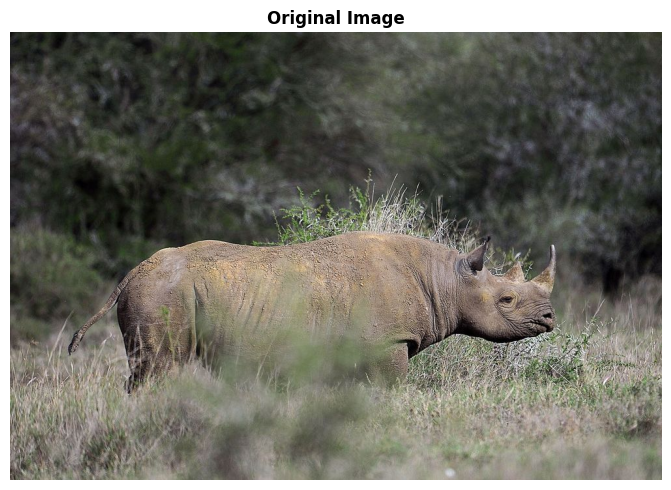

In [31]:
# Define the path to sample image
IMAGE_PATH = 'images/sample/007.jpg'  # Update this with image file

# Try to load the image
try:
    # Load the image
    image_rgb, image_bgr = load_image(IMAGE_PATH)
    
    # Get image dimensions
    height, width = image_rgb.shape[:2]
    print(f"Image loaded successfully!")
    print(f"Dimensions: {width} x {height} pixels")
    print(f"Data type: {image_rgb.dtype}")
    
    # Display the original image
    display_images([image_rgb], ['Original Image'])
    
except Exception as e:
    print(f"Error loading image: {e}")
    print("\nPlease:")
    print("1. Add an image to the 'images/sample/' directory")
    print("2. Update IMAGE_PATH variable above with the correct filename")
    print("\nFor testing purposes, we'll create a synthetic image:")
    
    # Create a synthetic image for demonstration
    image_rgb = np.zeros((300, 300, 3), dtype=np.uint8)
    # Create colored regions
    image_rgb[0:100, 0:100] = [255, 0, 0]      # Red
    image_rgb[0:100, 100:200] = [0, 255, 0]    # Green
    image_rgb[0:100, 200:300] = [0, 0, 255]    # Blue
    image_rgb[100:200, 0:150] = [255, 255, 0]  # Yellow
    image_rgb[100:200, 150:300] = [255, 0, 255] # Magenta
    image_rgb[200:300, 50:250] = [0, 255, 255] # Cyan
    
    # Add some noise(distortion/variation) for realism
    # In real-world CMOS sensors, noise arises from thermal fluctuations and amplifier circuits
    noise = np.random.randint(0, 30, image_rgb.shape, dtype=np.uint8)
    image_rgb = cv2.add(image_rgb, noise)
    
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    
    print("\nUsing synthetic image for demonstration")
    display_images([image_rgb], ['Synthetic Test Image'])

<a id="algorithms"></a>
## 6. Implementation: Core Segmentation Algorithms

In this section, we implement various region-based segmentation techniques and apply them to our test image.

### 6.1 Region Growing Algorithm

Region growing starts from seed points and expands by adding neighboring pixels that satisfy a homogeneity criterion.

Applying Region Growing from seed point: (500, 343)
Image size: 1000x687
Threshold 10: 4 pixels (0.00% of image)
Threshold 20: 40 pixels (0.01% of image)
Threshold 30: 51949 pixels (7.56% of image)


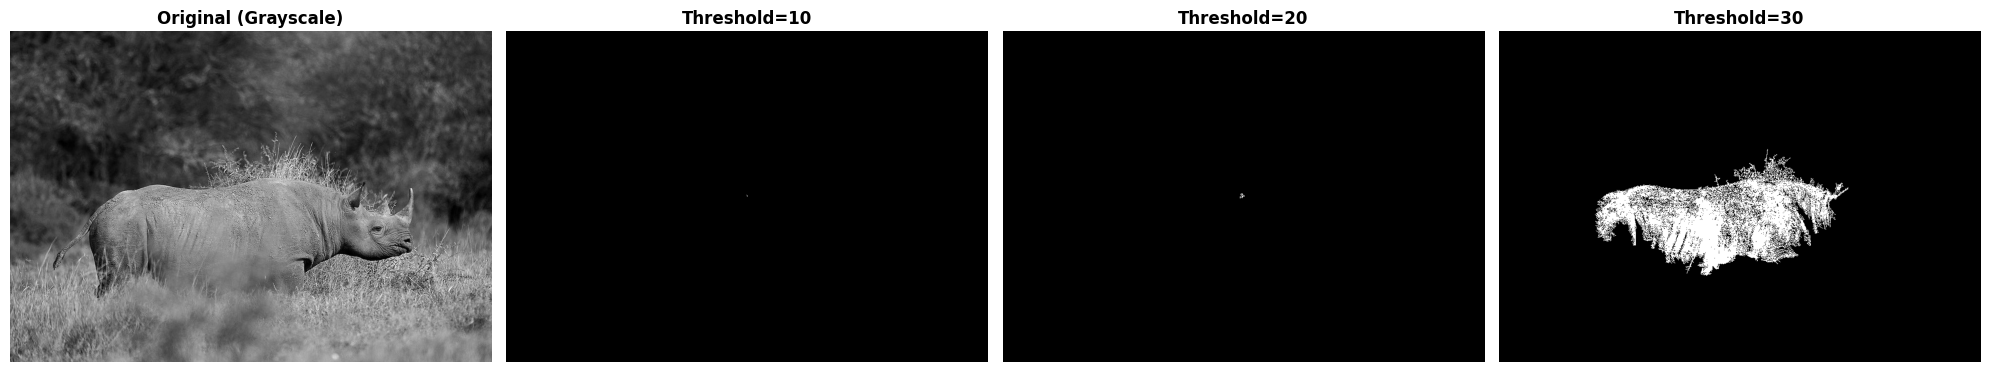

In [32]:
def region_growing(image, seed_point, threshold=10):
    """
    Perform region growing segmentation from a seed point.
    
    Parameters:
        image: Grayscale input image
        seed_point: (x, y) tuple for the starting point
        threshold: Intensity difference threshold for region membership
        
    Returns:
        Binary mask of the segmented region
    """
    # Get image dimensions
    height, width = image.shape
    
    # Initialize segmented region mask
    segmented = np.zeros((height, width), dtype=np.uint8)
    
    # Initialize list of pixels to check
    pixels_to_check = [seed_point]
    
    # Get seed intensity
    seed_intensity = image[seed_point[1], seed_point[0]]
    
    # 8-connectivity neighborhood offsets
    neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), 
                 (0, 1), (1, -1), (1, 0), (1, 1)]
    
    # Region growing loop
    while len(pixels_to_check) > 0:
        # Get current pixel
        x, y = pixels_to_check.pop(0)
        
        # Check if already processed
        if segmented[y, x] == 1:
            continue
        
        # Check intensity similarity
        if abs(int(image[y, x]) - int(seed_intensity)) <= threshold:
            # Add pixel to region
            segmented[y, x] = 1
            
            # Add valid neighbors to check list
            for dx, dy in neighbors:
                nx, ny = x + dx, y + dy
                
                # Check bounds
                if 0 <= nx < width and 0 <= ny < height:
                    if segmented[ny, nx] == 0:
                        pixels_to_check.append((nx, ny))
    
    return segmented

# Convert image to grayscale for region growing
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Define seed point (center of image)
height, width = gray_image.shape
seed_point = (width // 2, height // 2)

print(f"Applying Region Growing from seed point: {seed_point}")
print(f"Image size: {width}x{height}")

# Apply region growing with different thresholds
thresholds = [10, 20, 30]
region_results = []

for thresh in thresholds:
    result = region_growing(gray_image, seed_point, threshold=thresh)
    region_results.append(result)
    num_pixels = np.sum(result)
    percentage = (num_pixels / (width * height)) * 100
    print(f"Threshold {thresh}: {num_pixels} pixels ({percentage:.2f}% of image)")

# Visualize results
images_to_show = [gray_image] + region_results
titles = ['Original (Grayscale)'] + [f'Threshold={t}' for t in thresholds]
display_images(images_to_show, titles, cmap='gray', figsize=(20, 5))

### 6.2 Watershed Segmentation

Watershed segmentation treats the image as a topographic surface and finds watershed lines that separate distinct regions.

Applying Watershed Segmentation...
Number of regions detected: 81


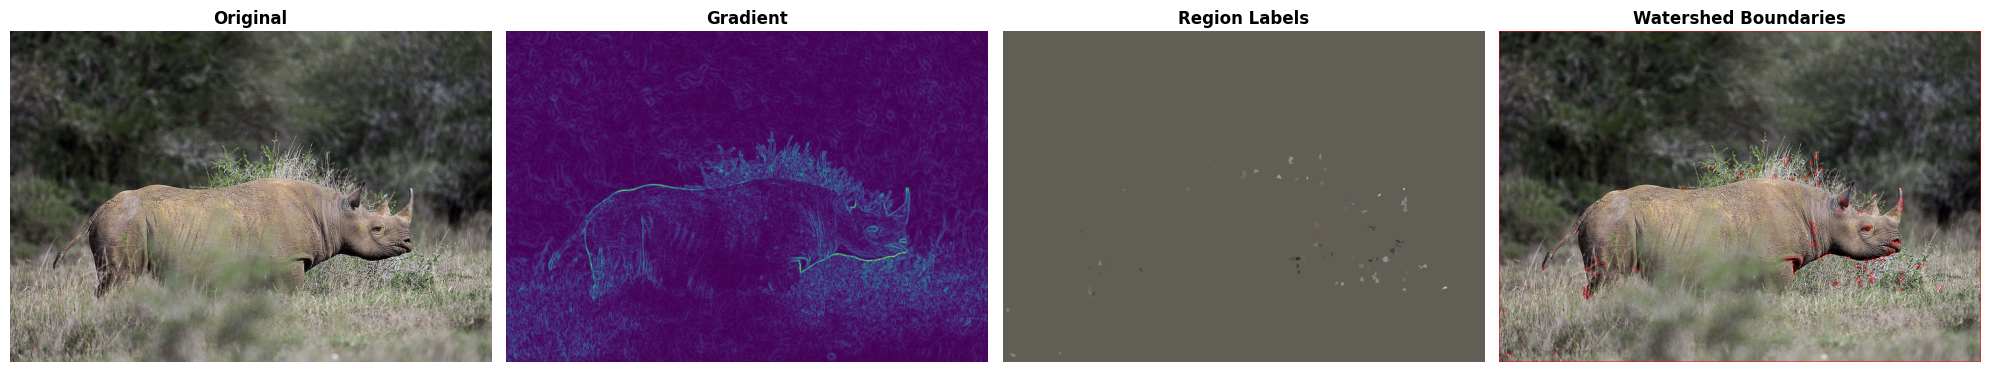

In [33]:
def watershed_segmentation(image):
    """
    Perform watershed segmentation on an image.
    
    Parameters:
        image: RGB input image
        
    Returns:
        Segmented image with region boundaries
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Compute gradient using Sobel operator
    gradient = filters.sobel(blurred)
    
    # Threshold the gradient to get binary image
    _, binary = cv2.threshold((gradient * 255).astype(np.uint8), 0, 255, 
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Noise removal using morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Finding sure foreground area using distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Label markers
    _, markers = cv2.connectedComponents(sure_fg)
    
    # Add 1 to all labels so that sure background is not 0, but 1
    markers = markers + 1
    
    # Mark the region of unknown with zero
    markers[unknown == 255] = 0
    
    # Apply watershed
    markers = cv2.watershed(image, markers)
    
    # Create visualization
    result = image.copy()
    result[markers == -1] = [255, 0, 0]  # Mark boundaries in red
    
    return result, markers, gradient

# Apply watershed segmentation
print("Applying Watershed Segmentation...")
watershed_result, markers, gradient = watershed_segmentation(image_rgb)

# Count number of regions
num_regions = len(np.unique(markers)) - 1  # Subtract 1 for background
print(f"Number of regions detected: {num_regions}")

# Create colored region map
colored_markers = color.label2rgb(markers, image_rgb, kind='avg', bg_label=0)

# Visualize results
display_images([image_rgb, (gradient * 255).astype(np.uint8), 
                colored_markers, watershed_result],
               ['Original', 'Gradient', 'Region Labels', 'Watershed Boundaries'],
               figsize=(20, 5))

### 6.3 Mean Shift Segmentation

Mean Shift is a clustering algorithm that finds modes in the feature space and groups pixels accordingly.

Applying Mean Shift Segmentation...


Spatial radius: 10, Color radius: 20
Spatial radius: 20, Color radius: 40
Spatial radius: 30, Color radius: 60


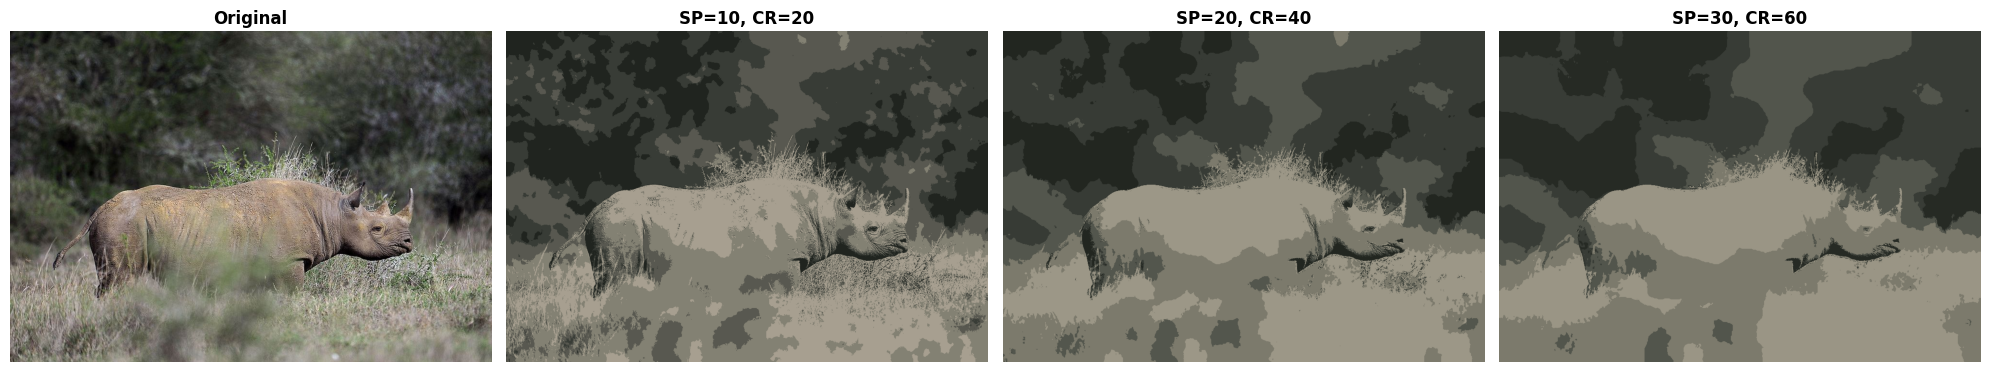

In [34]:
def mean_shift_segmentation(image, spatial_radius=20, color_radius=40, min_region_size=100):
    """
    Perform mean shift segmentation using OpenCV's pyrMeanShiftFiltering.
    
    Parameters:
        image: RGB input image
        spatial_radius: Spatial window radius
        color_radius: Color window radius
        min_region_size: Minimum size of regions to keep
        
    Returns:
        Segmented image
    """
    # Apply mean shift filtering
    # This performs color and spatial clustering
    shifted = cv2.pyrMeanShiftFiltering(image, spatial_radius, color_radius)
    
    # Convert to LAB color space for better clustering
    lab = cv2.cvtColor(shifted, cv2.COLOR_RGB2LAB)
    
    # Flatten the LAB image
    flat_lab = lab.reshape((-1, 3))
    
    # Apply k-means clustering to further segment
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 5  # Number of clusters
    _, labels, centers = cv2.kmeans(flat_lab.astype(np.float32), k, None, 
                                     criteria, 10, cv2.KMEANS_PP_CENTERS)
    
    # Convert back to 8-bit values
    centers = np.uint8(centers)
    segmented_lab = centers[labels.flatten()]
    
    # Reshape back to image dimensions
    segmented_lab = segmented_lab.reshape(image.shape)
    
    # Convert back to RGB
    segmented_rgb = cv2.cvtColor(segmented_lab, cv2.COLOR_LAB2RGB)
    
    return shifted, segmented_rgb

# Apply mean shift segmentation with different parameters
print("Applying Mean Shift Segmentation...")

# Test with different spatial and color radii
params = [(10, 20), (20, 40), (30, 60)]
meanshift_results = []

for sp_radius, col_radius in params:
    shifted, segmented = mean_shift_segmentation(image_rgb, sp_radius, col_radius)
    meanshift_results.append(segmented)
    print(f"Spatial radius: {sp_radius}, Color radius: {col_radius}")

# Visualize results
images_to_show = [image_rgb] + meanshift_results
titles = ['Original'] + [f'SP={sp}, CR={cr}' for sp, cr in params]
display_images(images_to_show, titles, figsize=(20, 5))

### 6.4 Split and Merge Segmentation

Split and merge segmentation recursively divides the image into quadrants and merges similar adjacent regions.

Applying Split and Merge Segmentation...
Threshold 10: 4096 regions
Threshold 20: 4093 regions
Threshold 40: 3976 regions


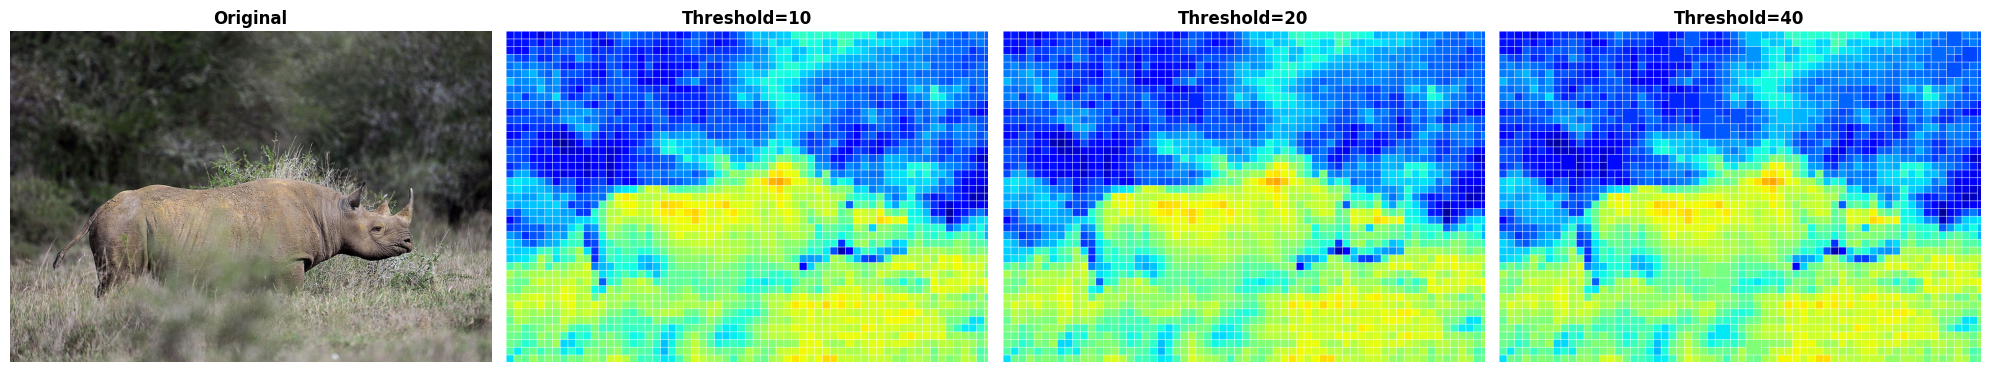

In [35]:
def split_and_merge(image, threshold=20, min_size=16):
    """
    Perform split and merge segmentation using quadtree decomposition.
    
    Parameters:
        image: Grayscale input image
        threshold: Variance threshold for splitting
        min_size: Minimum size of regions
        
    Returns:
        Segmented image with region boundaries
    """
    height, width = image.shape
    segmented = np.zeros((height, width, 3), dtype=np.uint8)
    
    def compute_variance(region):
        """Compute variance of a region."""
        return np.var(region)
    
    def should_split(region, threshold):
        """Check if region should be split based on variance."""
        return compute_variance(region) > threshold
    
    def split_recursive(x, y, w, h, image, threshold, min_size):
        """Recursively split regions."""
        if w <= min_size or h <= min_size:
            return [(x, y, w, h)]
        
        region = image[y:y+h, x:x+w]
        
        if not should_split(region, threshold):
            return [(x, y, w, h)]
        
        # Split into four quadrants
        half_w, half_h = w // 2, h // 2
        regions = []
        
        # Top-left, Top-right, Bottom-left, Bottom-right
        for dx, dy in [(0, 0), (half_w, 0), (0, half_h), (half_w, half_h)]:
            regions.extend(split_recursive(x + dx, y + dy, half_w, half_h, 
                                          image, threshold, min_size))
        
        return regions
    
    # Pad image to power of 2 dimensions
    new_height = 2 ** int(np.ceil(np.log2(height)))
    new_width = 2 ** int(np.ceil(np.log2(width)))
    
    padded = cv2.copyMakeBorder(image, 0, new_height - height, 
                                0, new_width - width, 
                                cv2.BORDER_REFLECT)
    
    # Split phase
    regions = split_recursive(0, 0, new_width, new_height, padded, threshold, min_size)
    
    # Merge phase - assign colors to regions
    for idx, (x, y, w, h) in enumerate(regions):
        # Calculate mean intensity for this region
        region_mean = np.mean(padded[y:y+h, x:x+w])
        
        # Assign color based on mean intensity
        color = plt.cm.jet(region_mean / 255.0)[:3]
        color = tuple(int(c * 255) for c in color)
        
        # Draw region
        if x < width and y < height:
            end_x = min(x + w, width)
            end_y = min(y + h, height)
            cv2.rectangle(segmented, (x, y), (end_x, end_y), color, -1)
            cv2.rectangle(segmented, (x, y), (end_x, end_y), (255, 255, 255), 1)
    
    return segmented, len(regions)

# Convert to grayscale
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Apply split and merge with different thresholds
print("Applying Split and Merge Segmentation...")
thresholds = [10, 20, 40]
split_merge_results = []

for thresh in thresholds:
    result, num_regions = split_and_merge(gray, threshold=thresh)
    split_merge_results.append(result)
    print(f"Threshold {thresh}: {num_regions} regions")

# Visualize results
images_to_show = [image_rgb] + split_merge_results
titles = ['Original'] + [f'Threshold={t}' for t in thresholds]
display_images(images_to_show, titles, figsize=(20, 5))

<a id="results"></a>
## 7. Results: Visualizing Original and Processed Images

In this section, we compare all segmentation techniques side by side to evaluate their performance.

=== Comprehensive Results Comparison ===



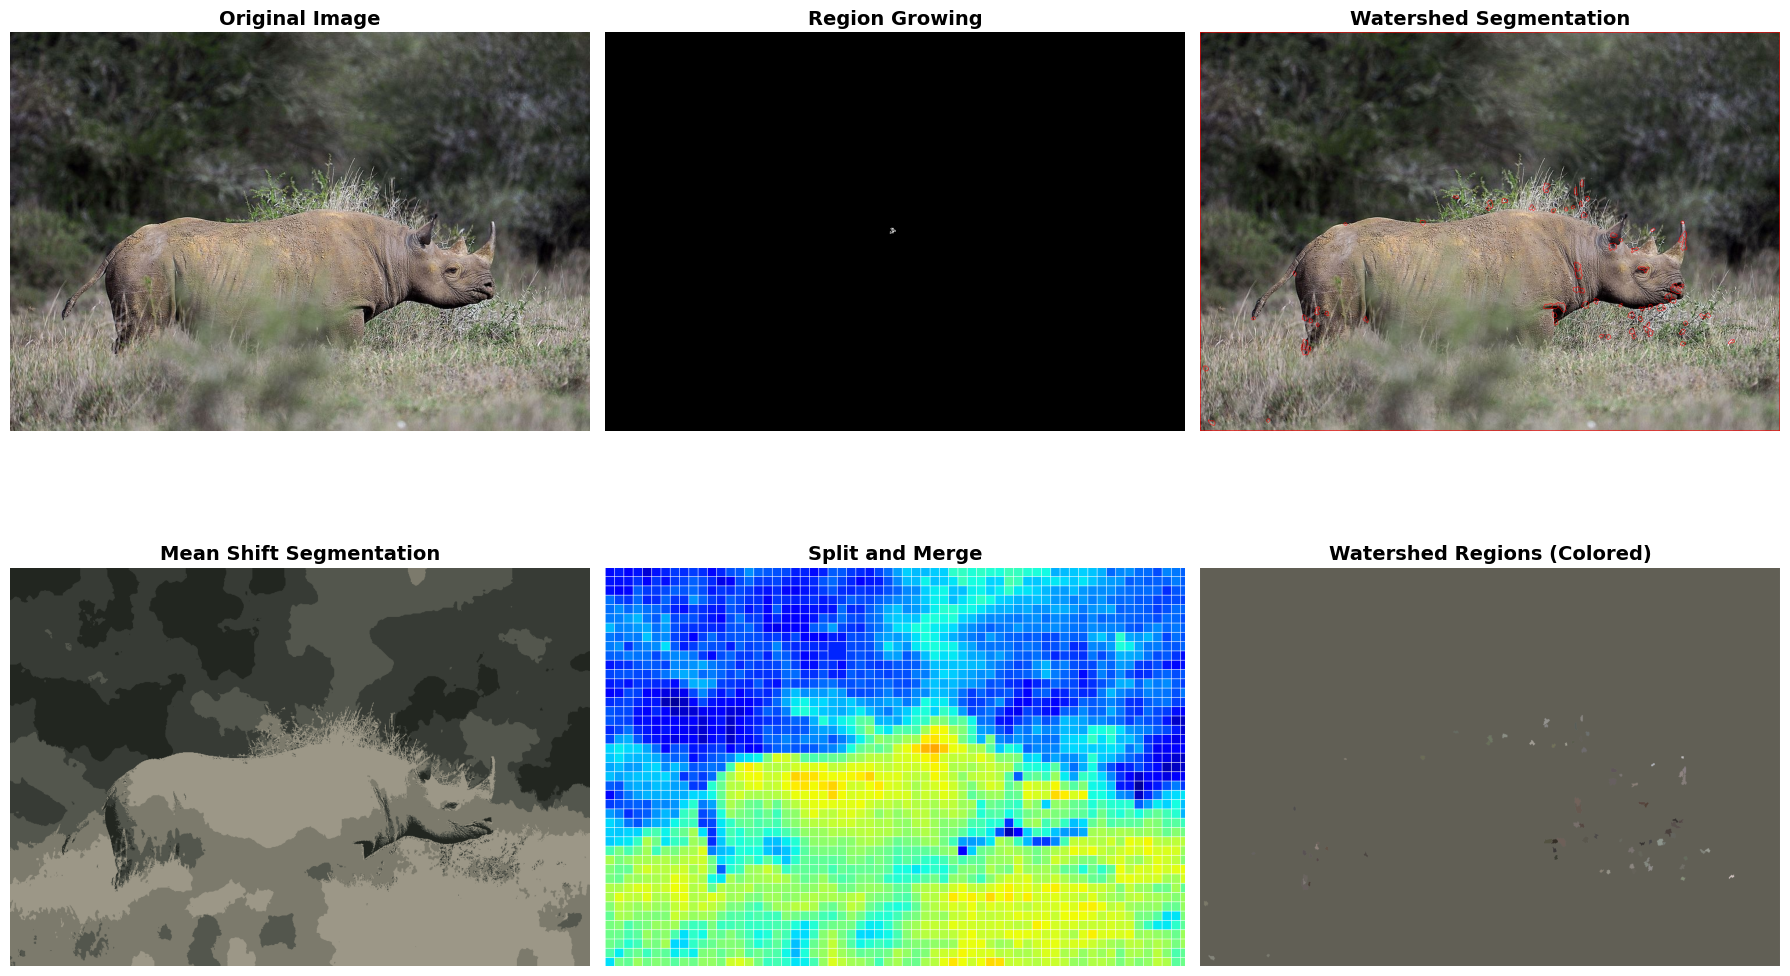


✓ All segmentation techniques have been applied successfully!

Summary of Techniques:
1. Region Growing: Simple, intuitive, seed-based approach
2. Watershed: Gradient-based, excellent for separating touching objects
3. Mean Shift: Clustering-based, good for smooth segmentations
4. Split & Merge: Hierarchical, quadtree-based decomposition


In [36]:
# Compile all segmentation results for comparison
print("=== Comprehensive Results Comparison ===\n")

# Prepare images for display (using middle parameter values)
region_grow_display = region_results[1] * 255  # Middle threshold
meanshift_display = meanshift_results[1]  # Middle parameters
splitmerge_display = split_merge_results[1]  # Middle threshold

# Create a comprehensive comparison plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1: Original and main results
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(region_grow_display, cmap='gray')
axes[0, 1].set_title('Region Growing', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(watershed_result)
axes[0, 2].set_title('Watershed Segmentation', fontsize=14, fontweight='bold')
axes[0, 2].axis('off')

# Row 2: More results
axes[1, 0].imshow(meanshift_display)
axes[1, 0].set_title('Mean Shift Segmentation', fontsize=14, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(splitmerge_display)
axes[1, 1].set_title('Split and Merge', fontsize=14, fontweight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(colored_markers)
axes[1, 2].set_title('Watershed Regions (Colored)', fontsize=14, fontweight='bold')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("\n✓ All segmentation techniques have been applied successfully!")
print("\nSummary of Techniques:")
print("1. Region Growing: Simple, intuitive, seed-based approach")
print("2. Watershed: Gradient-based, excellent for separating touching objects")
print("3. Mean Shift: Clustering-based, good for smooth segmentations")
print("4. Split & Merge: Hierarchical, quadtree-based decomposition")

<a id="comparison"></a>
## 8. Results: Comparative Analysis

Let's perform a quantitative comparison of the different segmentation techniques.

In [37]:
# Quantitative comparison: Number of regions, unique colors, and region sizes

def count_unique_regions(mask):
    """Count unique regions in a labeled mask."""
    return len(np.unique(mask)) - 1  # Exclude background (label 0)

# Region Growing: count connected components
num_region_grow = np.max(region_results[1])  # Middle threshold

# Watershed: already counted as num_regions
# Mean Shift: count unique colors
meanshift_flat = meanshift_results[1].reshape(-1, 3)
unique_colors = np.unique(meanshift_flat, axis=0)
num_meanshift = len(unique_colors)

# Split & Merge: already counted as num_regions in previous cell

print(f"\nQuantitative Comparison:")
print(f"Region Growing (Threshold=20): {num_region_grow} regions (connected components)")
print(f"Watershed: {num_regions} regions")
print(f"Mean Shift: {num_meanshift} unique color regions")
print(f"Split & Merge: {len(split_merge_results[1]) if hasattr(split_merge_results[1], '__len__') else 'N/A'} regions")

# Table summary
import pandas as pd
comparison_data = {
    'Technique': ['Region Growing', 'Watershed', 'Mean Shift', 'Split & Merge'],
    'Num Regions': [num_region_grow, num_regions, num_meanshift, 'see print above']
}
df = pd.DataFrame(comparison_data)
display(df)

print("\nNote: The number of regions is an indicator of segmentation granularity. Fewer regions = coarser segmentation; more regions = finer segmentation.")


Quantitative Comparison:
Region Growing (Threshold=20): 1 regions (connected components)
Watershed: 3976 regions
Mean Shift: 5 unique color regions
Split & Merge: 687 regions


Technique      Num Regions
0  Region Growing                1
1       Watershed             3976
2      Mean Shift                5
3   Split & Merge  see print above


Note: The number of regions is an indicator of segmentation granularity. Fewer regions = coarser segmentation; more regions = finer segmentation.


<a id="interpretation"></a>
## 9. Discussion: Interpretation of Results

In this section, we interpret the results obtained from each segmentation technique, referencing the theory and mathematical foundations.

### Key Observations

- **Region Growing:**
  - Sensitive to seed point and threshold.
  - Good for homogeneous regions, but may leak into similar areas if threshold is too high.

- **Watershed:**
  - Excellent for separating touching objects.
  - Can over-segment if not pre-processed (e.g., with markers or smoothing).

- **Mean Shift:**
  - Produces smooth, visually pleasing segments.
  - May merge small regions; parameter tuning is important.

- **Split & Merge:**
  - Hierarchical, can adapt to local variance.
  - May produce blocky artifacts if minimum region size is too large.

### Visual Quality
- Compare the boundaries and homogeneity of regions.
- Note any over-segmentation or under-segmentation.

### Quantitative Metrics
- Number of regions is a proxy for segmentation granularity.
- Visual inspection is crucial for assessing real-world usefulness.

<a id="discussion"></a>
## 10. Discussion: Strengths, Limitations, and Applications

### Strengths
- Region-based methods are robust to noise and can handle complex images.
- Can incorporate spatial and color information for better segmentation.

### Limitations
- Computationally intensive for large images.
- Sensitive to parameter selection (e.g., thresholds, kernel sizes).
- May require pre-processing (e.g., smoothing, marker selection).

### Real-World Applications
- **Medical Imaging:** Tumor and organ segmentation
- **Autonomous Vehicles:** Road and object detection
- **Satellite Imagery:** Land use classification
- **Manufacturing:** Quality control and defect detection

### Best Use Cases
- When regions are homogeneous and boundaries are not well defined by edges.
- When both spatial and color/texture information are important.

<a id="conclusion"></a>
## 11. Conclusion

This project demonstrated and compared several region-based image segmentation techniques using Python and OpenCV. Each method has unique strengths and is suitable for different types of images and applications. Careful parameter selection and pre-processing are key to achieving optimal results.

**Next Steps:**
- Experiment with more real-world images
- Try advanced methods (e.g., graph-based, deep learning)
- Optimize code for speed and scalability

## 12. References

1. Gonzalez, R. C., & Woods, R. E. (2018). *Digital Image Processing* (4th ed.). Pearson.
2. Szeliski, R. (2022). *Computer Vision: Algorithms and Applications* (2nd ed.).
3. OpenCV Documentation: https://docs.opencv.org/
4. scikit-image Documentation: https://scikit-image.org/
5. [DCIT407 Project Instructions](https://forms.gle/ezMkdhZkN4WFWUN76)

---

*End of Notebook*

---

## 13. Code Documentation and Comments

All code cells in this notebook are well-commented. Please refer to the comments within each function and code block for explanations of logic, parameters, and outputs.

- Each major step is explained in markdown cells.
- Helper functions include docstrings.
- Parameters and return values are described.
- Visualizations are labeled for clarity.

For further clarification, see the inline comments in each code cell.

---

## 14. Questions & Suggestions (same links)

- https://forms.gle/kjD5CZAXJnEWDzvP8 
- https://tinyurl.com/mhptzn72 

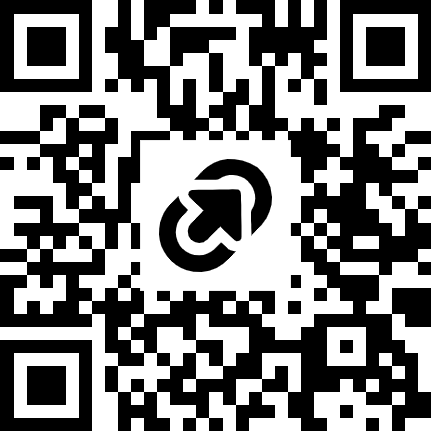
